## Project name: Plant growth milestone classification 

In [564]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#### Loading loan approval data from the csv file

In [447]:
df = pd.read_csv('./data/loan_approval_dataset.csv')

In [449]:
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [450]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

#### Checking for null values in the dataframe

In [453]:
missing_values = df.isnull()

In [455]:
missing_values

loan_id   no_of_dependents   education   self_employed   income_annum  \
0       False              False       False           False          False   
1       False              False       False           False          False   
2       False              False       False           False          False   
3       False              False       False           False          False   
4       False              False       False           False          False   
...       ...                ...         ...             ...            ...   
4264    False              False       False           False          False   
4265    False              False       False           False          False   
4266    False              False       False           False          False   
4267    False              False       False           False          False   
4268    False              False       False           False          False   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0            False       False         False                      False   
1            False       False         False                      False   
2            False       False         False                      False   
3            False       False         False                      False   
4            False       False         False                      False   
...            ...         ...           ...                        ...   
4264         False       False         False                      False   
4265         False       False         False                      False   
4266         False       False         False                      False   
4267         False       False         False                      False   
4268         False       False         False                      False   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                        False                 False              False   
1                        False                 False              False   
2                        False                 False              False   
3                        False                 False              False   
4                        False                 False              False   
...                        ...                   ...                ...   
4264                     False                 False              False   
4265                     False                 False              False   
4266                     False                 False              False   
4267                     False                 False              False   
4268                     False                 False              False   

       loan_status  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
4264         False  
4265         False  
4266         False  
4267         False  
4268         False  

[4269 rows x 13 columns]

In [456]:
missing_values_count = df.isnull().sum()

In [457]:
missing_values_count

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### No missing values found above 

In [459]:
df.shape

(4269, 13)

In [460]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [461]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

#### Observation
##### Can see the highest and lowest annual income and the longest and shortest loan term requested. The same logic applies to columns: number of dependents, loan amount requested, residential assets value, commercial assets value, luxury assets value, and bank asset value. 

In [463]:
#for col in df.columns:
#    print(f"{col}:/n{df[col].value_counts()}/n")

#### Observations
##### The data is evenly distributed among people with 0-5 dependents, graduate/not graduate, and loan term. 
##### The dataset contains more approvals than rejections (over 1000 more)

#### Number of dependents value counts 

In [468]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [470]:
df
no_of_dependents_vc = df[' no_of_dependents'].value_counts()

#### Visual representation of soil type value counts 

Text(0.5, 1.0, 'Number of dependents counts')

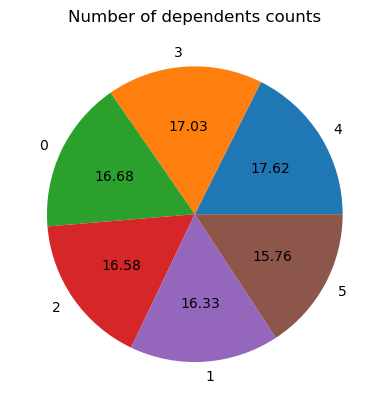

In [474]:
no_of_dependents_vc.plot(kind ='pie', autopct = '%0.2f')
plt.ylabel(None)
plt.title('Number of dependents counts')

#### Histogram visualization for the distribution of sunlight hours

<Axes: ylabel='Count'>

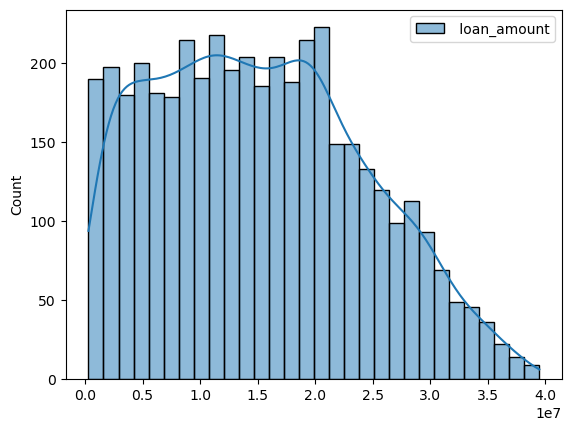

In [482]:
sns.histplot(df[[' loan_amount']], bins = 30, kde = True, color = 'green')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_19404\4078907149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_wf.values, y = df_wf.index, palette = 'pastel')


<Axes: ylabel=' education'>

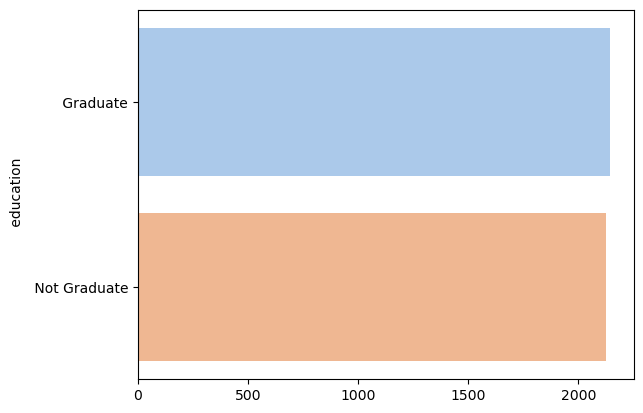

In [485]:
df_wf = df[' education'].value_counts()
sns.barplot(x = df_wf.values, y = df_wf.index, palette = 'pastel')

#### Analyzing the relation between numeric columns using pairplot

In [488]:
df_numeric_cols = df[[' income_annum', ' loan_amount', ' cibil_score']]

In [491]:
'loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object'

IndentationError: unindent does not match any outer indentation level (<string>, line 5)

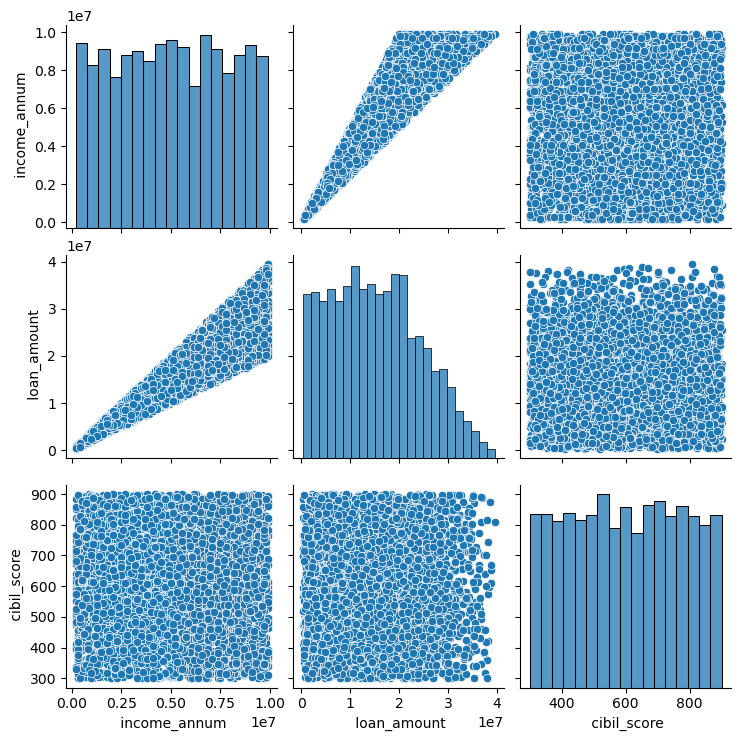

In [493]:
sns.pairplot(data = df_numeric_cols)

In [494]:
#### Conclusion:

#### Convert non-numerical variables into dummy variables

In [498]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [500]:
df_dummies = pd.get_dummies(df, columns = [' education',' self_employed'], drop_first = True)

In [502]:
df_dummies.head()

loan_id   no_of_dependents   income_annum   loan_amount   loan_term  \
0        1                  2        9600000      29900000          12   
1        2                  0        4100000      12200000           8   
2        3                  3        9100000      29700000          20   
3        4                  3        8200000      30700000           8   
4        5                  5        9800000      24200000          20   

    cibil_score   residential_assets_value   commercial_assets_value  \
0           778                    2400000                  17600000   
1           417                    2700000                   2200000   
2           506                    7100000                   4500000   
3           467                   18200000                   3300000   
4           382                   12400000                   8200000   

    luxury_assets_value   bank_asset_value  loan_status  \
0              22700000            8000000     Approved   
1               8800000            3300000     Rejected   
2              33300000           12800000     Rejected   
3              23300000            7900000     Rejected   
4              29400000            5000000     Rejected   

    education_ Not Graduate   self_employed_ Yes  
0                     False                False  
1                      True                 True  
2                     False                False  
3                     False                False  
4                      True                 True

In [504]:
df_dummies.dtypes()

TypeError: 'Series' object is not callable

#### Modeling

#### Defining x and y 

In [508]:
X = df_dummies.drop(columns = [' loan_status']) 
y = df_dummies[' loan_status']

In [510]:
X

loan_id   no_of_dependents   income_annum   loan_amount   loan_term  \
0           1                  2        9600000      29900000          12   
1           2                  0        4100000      12200000           8   
2           3                  3        9100000      29700000          20   
3           4                  3        8200000      30700000           8   
4           5                  5        9800000      24200000          20   
...       ...                ...            ...           ...         ...   
4264     4265                  5        1000000       2300000          12   
4265     4266                  0        3300000      11300000          20   
4266     4267                  2        6500000      23900000          18   
4267     4268                  1        4100000      12800000           8   
4268     4269                  1        9200000      29700000          10   

       cibil_score   residential_assets_value   commercial_assets_value  \
0              778                    2400000                  17600000   
1              417                    2700000                   2200000   
2              506                    7100000                   4500000   
3              467                   18200000                   3300000   
4              382                   12400000                   8200000   
...            ...                        ...                       ...   
4264           317                    2800000                    500000   
4265           559                    4200000                   2900000   
4266           457                    1200000                  12400000   
4267           780                    8200000                    700000   
4268           607                   17800000                  11800000   

       luxury_assets_value   bank_asset_value   education_ Not Graduate  \
0                 22700000            8000000                     False   
1                  8800000            3300000                      True   
2                 33300000           12800000                     False   
3                 23300000            7900000                     False   
4                 29400000            5000000                      True   
...                    ...                ...                       ...   
4264               3300000             800000                     False   
4265              11000000            1900000                      True   
4266              18100000            7300000                      True   
4267              14100000            5800000                      True   
4268              35700000           12000000                     False   

       self_employed_ Yes  
0                   False  
1                    True  
2                   False  
3                   False  
4                    True  
...                   ...  
4264                 True  
4265                 True  
4266                False  
4267                False  
4268                False  

[4269 rows x 12 columns]

In [512]:
y

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

#### Split the dataset into training and test data

In [515]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.20) #80% training, 20% testing

In [517]:
X_train.shape

(3415, 12)

In [519]:
X_test.shape

(854, 12)

#### Fit the model

In [522]:
clf = tree.DecisionTreeClassifier()

In [524]:
clf = clf.fit(X_train, y_train)

#### Evaluate the model

In [526]:
y_test #actual answers

2701     Approved
3836     Rejected
2300     Approved
995      Approved
462      Approved
          ...    
3005     Approved
1225     Approved
2141     Approved
2182     Rejected
517      Rejected
Name:  loan_status, Length: 854, dtype: object

In [528]:
clf.predict(X_test) #models predicted answers

array([' Approved', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Rejected', ' Approved',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Rejected', ' Rejected', ' Rejected', ' Rejected',
       ' Rejected', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Rejected', ' Rejected', ' Rejected', ' Approved',
       ' Rejected', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Rejected', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Rejected', ' Rej

In [530]:
clf.score(X_test, y_test)

0.9765807962529274

In [532]:
#### Visualize our tree

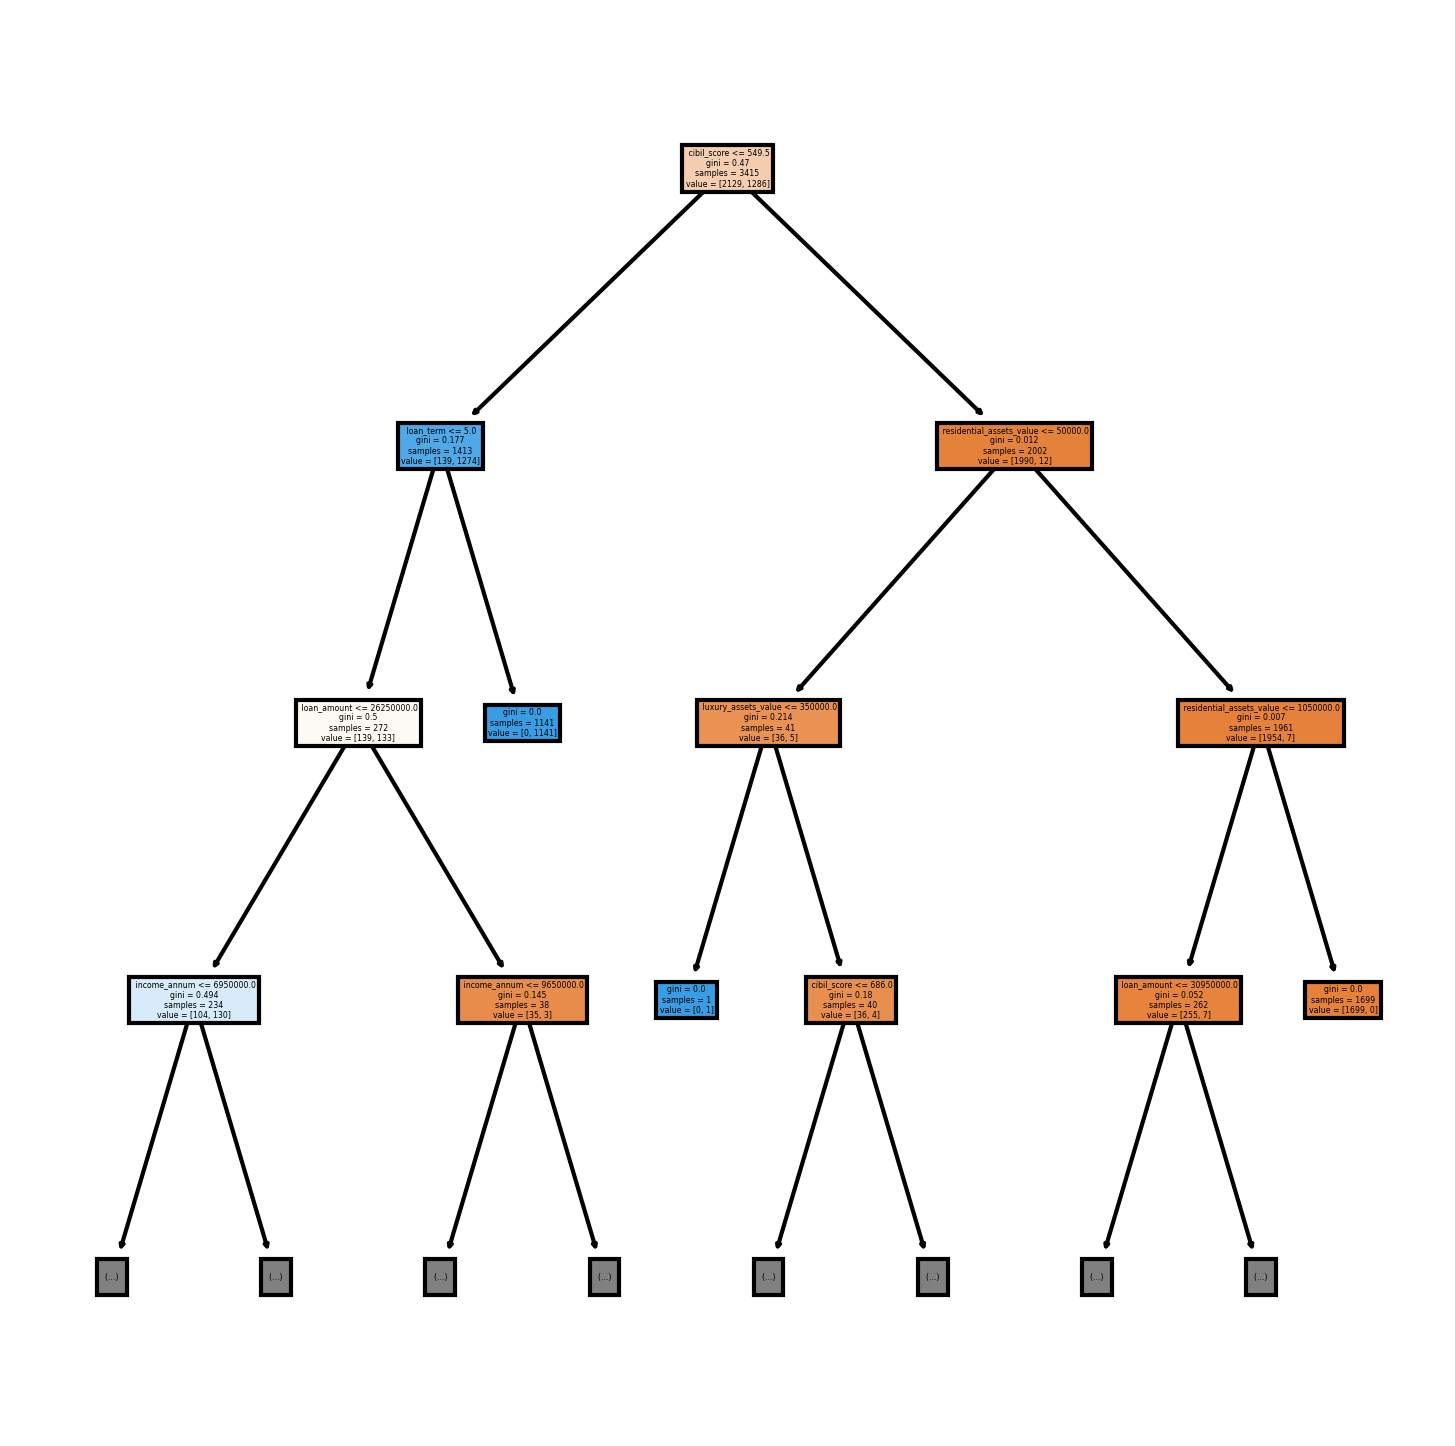

In [534]:
fig,axes = plt.subplots(nrows = 1, figsize = (6,6), dpi = 300)
tree.plot_tree(clf,max_depth = 3, feature_names = X.columns, filled = True)
plt.show()

In [537]:
#### exploring feature importance

In [539]:
fi = clf.feature_importances_
fi = pd.Series(data = fi, index = X.columns)

In [541]:
fi.sort_values(ascending = False, inplace = True)

In [543]:
fi

 cibil_score                 0.836660
 loan_term                   0.072654
 loan_amount                 0.035255
 income_annum                0.028668
 commercial_assets_value     0.010143
 luxury_assets_value         0.006376
 no_of_dependents            0.004206
 residential_assets_value    0.003232
loan_id                      0.001974
 bank_asset_value            0.000832
 education_ Not Graduate     0.000000
 self_employed_ Yes          0.000000
dtype: float64

In [545]:
#### Visualization

sns.scatterplot(data=df_dummies, x = ' cibil_score', y = ' income_annum', hue = ' loan_status')

C:\Users\nikhi\AppData\Local\Temp\ipykernel_19404\411082202.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


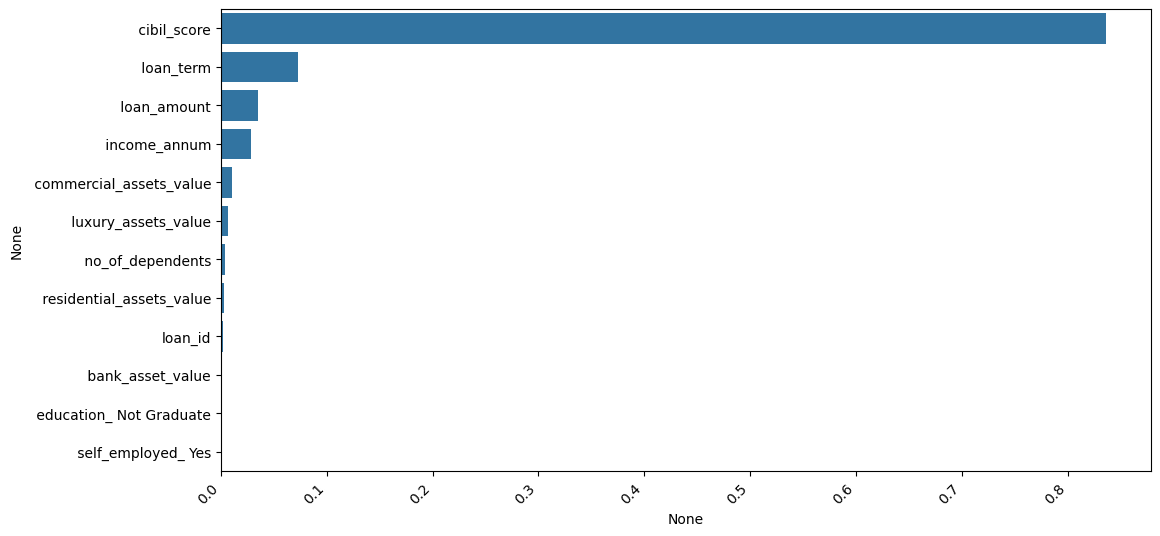

In [549]:
plt.figure(figsize = (12, 6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), roation = 45, horizontalalignment = 'right')
plt.show

<Axes: xlabel=' cibil_score', ylabel=' income_annum'>

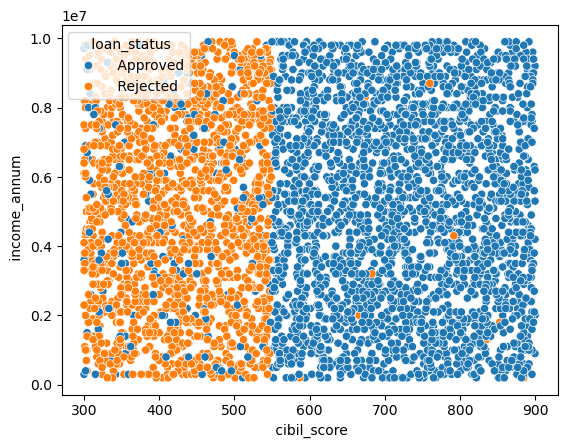

In [557]:
sns.scatterplot(data = df_dummies, x = ' cibil_score', y = ' income_annum', hue = ' loan_status')

#### Majority of people that requested for a loan and had a credit score less than 550 got rejected. 

#### Trying with random forest classifier

In [566]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [570]:
y_pred = random_forest_classifier.predict(X_test)

In [572]:
accuracy_score(y_test, y_pred)

0.9812646370023419

#### Trying with logistic regression 

In [575]:
logreg_cf = LogisticRegression(random_state = 0)
logreg_cf.fit(X_train, y_train)

y_pred = logreg_cf.predict(X_test)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [579]:
accuracy_score(y_test, y_pred)

0.7388758782201406

#### After comparing 3 classification models: decision tree, random forest, and logistic regression:
#### The best final accuracy score is 98.12% and is from random forest classifier
#### The worst final accuracy score is 73.88% and is from logist regression